In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


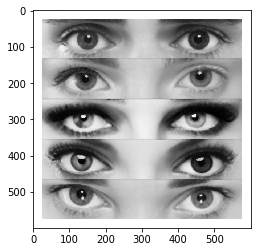

In [2]:
# Lemos imagen con los ojos a detectar
img = cv.imread('eyes.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# Suavizamos la imagen
gray = cv.medianBlur(gray,5)

# Mostramos imagen en escala de grises
plt.imshow(gray, cmap='gray')


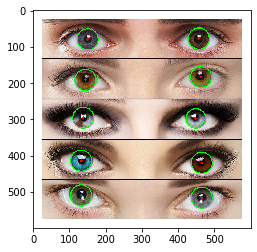

In [3]:
# Obtenemos los círculos por la transformada de Hough
# (imagen en grises, método, flag de resolución del acumulador, dist mín entre centros de círculos
# umbral alto de Canny, umbral del acumulador, radio_min, radio_max)
img_out_iris = img.copy()
circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=80,param1=255,param2=10,minRadius=25,maxRadius=30)

# Mostramos los círculos superpuestos a la imagen original
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out_iris,(i[0],i[1]),i[2],(0,255,0),2)
    
    # Dibujamos el centro del círculo
    cv.circle(img_out_iris,(i[0],i[1]),2,(0,0,255),3)
plt.imshow(cv.cvtColor(img_out_iris, cv.COLOR_BGR2RGB))


In [4]:
# Ordenamos los ojos por la coordenada vertical, de manera de tener consecutivos los ojos de la misma persona
circle_centers = circles[0, :, 0:2]
sorted_eyes = circle_centers[circle_centers[:, 1].argsort()]

# Calculamos y mostramos las distancias euclídeas en píxeles entre los ojos
for i in range(5):
    print('la distancia entre el {}-ésimo par de ojos es de {} píxeles'.format(
        i + 1,
        np.sqrt(np.sum((sorted_eyes[i * 2 + 1] - sorted_eyes[i * 2]) ** 2))),
    )


la distancia entre el 1-ésimo par de ojos es de 167.642476717567 píxeles
la distancia entre el 2-ésimo par de ojos es de 188.81737208212596 píxeles
la distancia entre el 3-ésimo par de ojos es de 174.83706700811473 píxeles
la distancia entre el 4-ésimo par de ojos es de 211.48049555455464 píxeles
la distancia entre el 5-ésimo par de ojos es de 211.48049555455464 píxeles


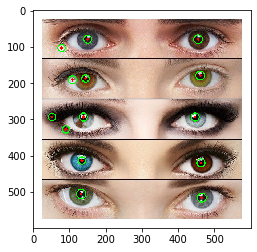

In [5]:
# Ahora el objetivo es encontrar las pupilas

# Obtenemos los círculos por la transformada de Hough
# (imagen en grises, método, flag de resolución del acumulador, dist mín entre centros de círculos
# umbral alto de Canny, umbral del acumulador, radio_min, radio_max)
img_out_pupilas = img.copy()
circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=20,param1=120,param2=15,minRadius=8,maxRadius=15)

# Mostramos los círculos superpuestos a la imagen original
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out_pupilas,(i[0],i[1]),i[2],(0,255,0),2)
    
    # Dibujamos el centro del círculo
    cv.circle(img_out_pupilas,(i[0],i[1]),2,(0,0,255),3)
plt.imshow(cv.cvtColor(img_out_pupilas, cv.COLOR_BGR2RGB))


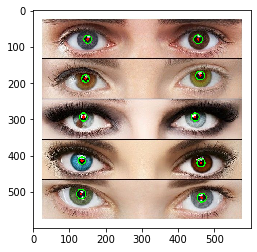

In [6]:
# Dado que los resultados no son tan buenos como en el caso anterior, y aprovechando que el iris y la pupila son
# concéntricos, filtramos los centros de las pupilas, dejando sólo uno por cada iris detectado, eligiendo el más cercano

def distance(arr1, arr2):
    # Calcula la distancia entre dos arrays (2, 1) y la retorna.
    # Se usa el cuadrado de la distancia euclídea para ahorrar el paso de obtener la raíz
    return np.sum((arr1 - arr2) ** 2)

candidatos_pupilas = circles[0, :, 0:2]
indices = []
for i in range(len(sorted_eyes)):
    # Obtener el candidato de pupila más próximo al centro del iris analizado actualmente
    index_closest = 0
    min_distance = distance(candidatos_pupilas[0], sorted_eyes[i])
    for j in range(1, len(candidatos_pupilas)):
        distance_temp = distance(candidatos_pupilas[j], sorted_eyes[i])
        if distance_temp < min_distance:
            index_closest = j
            min_distance = distance_temp
    indices.append(index_closest)

# Mostramos los círculos filtrados superpuestos a la imagen original
img_out_pupilas2 = img.copy()
indices_np = np.array(indices)
circles = np.uint16(np.around(circles[:, indices, :]))
for i in circles[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out_pupilas2,(i[0],i[1]),i[2],(0,255,0),2)
    
    # Dibujamos el centro del círculo
    cv.circle(img_out_pupilas2,(i[0],i[1]),2,(0,0,255),3)
plt.imshow(cv.cvtColor(img_out_pupilas2, cv.COLOR_BGR2RGB))
    

In [7]:
# Ordenamos los ojos por la coordenada vertical, de manera de tener consecutivos los ojos de la misma persona
circle_centers = circles[0, :, 0:2]
sorted_eyes = circle_centers[circle_centers[:, 1].argsort()]

# Calculamos y mostramos las distancias euclídeas en píxeles entre los ojos
for i in range(5):
    print('la distancia entre el {}-ésimo par de ojos es de {} píxeles'.format(
        i + 1,
        np.sqrt(np.sum((sorted_eyes[i * 2 + 1] - sorted_eyes[i * 2]) ** 2))),
    )


la distancia entre el 1-ésimo par de ojos es de 163.95121225535357 píxeles
la distancia entre el 2-ésimo par de ojos es de 185.42923178398814 píxeles
la distancia entre el 3-ésimo par de ojos es de 171.25419702886117 píxeles
la distancia entre el 4-ésimo par de ojos es de 205.1438519673451 píxeles
la distancia entre el 5-ésimo par de ojos es de 211.6317556511782 píxeles
